In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

def get_train():
    df = pd.read_csv('./data/data2021.student.csv').drop(['Class', 'ID'], axis=1)
    df = df.iloc[:1000]
    return df

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


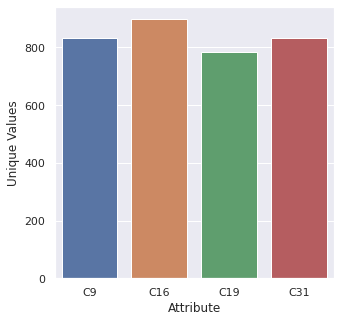

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


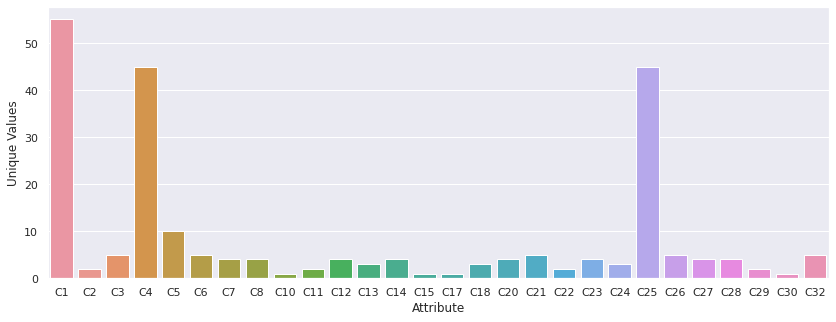

In [27]:
# Unique values
df = get_train()

unique = df.nunique()

unique_high = unique[unique > 100]
unique_low = unique[unique <= 100]
sns.set(rc={
    'figure.figsize':(len(unique_high)*1.25,5),
})
ax = sns.barplot(unique_high.index, unique_high.values, dodge=False)
ax.set(xlabel="Attribute", ylabel="Unique Values")
plt.show()

sns.set(rc={
    'figure.figsize':(len(unique_low)*0.5,5),
})
ax = sns.barplot(unique_low.index, unique_low.values, dodge=False)
ax.set(xlabel="Attribute", ylabel="Unique Values")
plt.show()

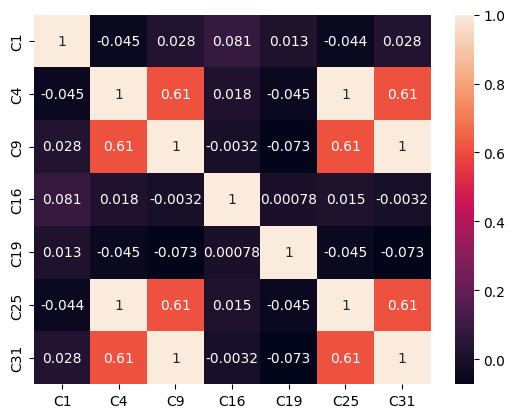

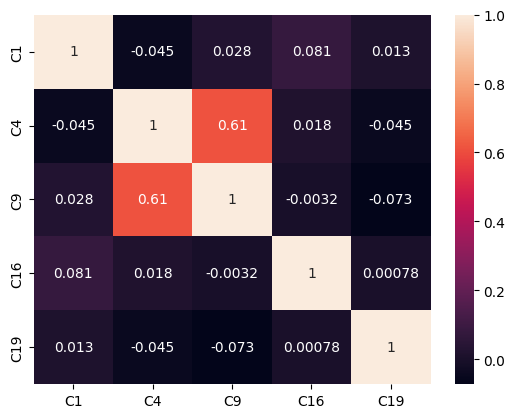

In [38]:
# Numeric Correlation Matrix
df = get_train()

# Convert attributes with less than threshold unique values to categorical
lt_cat_threshold_cols = [col for col in df.columns if df[col].nunique() <= 10]
df[lt_cat_threshold_cols] = df[lt_cat_threshold_cols].astype('category')

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

duplicate_cols = df.transpose().duplicated()
df = df.drop(list(df.columns[duplicate_cols]), axis=1)

sns.reset_defaults()
sns.heatmap(corr, annot=True)
plt.show()

# Dropping extremely highly correlated categories
import data_prep
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
high_cor_cols = data_prep._get_high_corr_cols(df[numeric_cols], 0.95)
df = df.drop(high_cor_cols, axis=1)
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
corr = df[numeric_cols].corr()

sns.heatmap(corr, annot=True)
plt.show()

/home/moritz/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


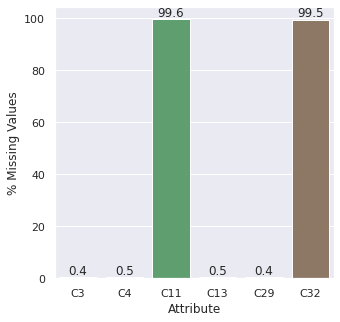

In [9]:
## Find missing values

df = pd.read_csv('./data/data2021.student.csv').drop(['Class', 'ID'], axis=1)

# Missing train data
df_train = df.iloc[:1000]
missing_train = df_train.isnull().sum()
missing_train = missing_train.apply(lambda x: (x/1000) * 100)
missing_train = missing_train.loc[missing_train != 0]
sns.set(rc={
    'figure.figsize':(5,5),
})
ax = sns.barplot(missing_train.index, missing_train.values)
ax.set(xlabel="Attribute", ylabel="% Missing Values")
ax.bar_label(ax.containers[0])
plt.show()

# ## Missing test data
# df_test = df.iloc[1000:]

# missing_test = df.isnull().sum()
# missing_test = missing_test.loc[missing_test != 0]
# missing_test = missing_test / len(df_test)
# sns.set(rc={
#     'figure.figsize':(5,5),
# })

# plot = sns.barplot(missing_test.index, missing_test.values)
# plot.bar_label(plot.containers[0])
# plt.show()